In [4]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import math
import use_autograd
use_autograd_use = 0

import fft_funs as iff
import kbloch as kb

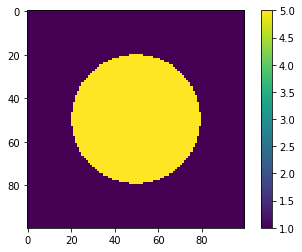

In [5]:
Nx = 100
Ny = 100
Lx = 1.
Ly = 1.
radius = 0.3
L1 = [Lx,0.]
L2 = [0.,Ly]

dx = 1./Nx
dy = 1./Ny

x0 = np.linspace(0,Lx,Nx)
y0 = np.linspace(0,Ly,Ny)
x, y = np.meshgrid(x0,y0,indexing='ij')
sphere = (x-.5*Lx)**2+(y-.5*Ly)**2<radius**2

eps_grid = np.ones((Nx,Ny));
eps_grid[sphere]=5

plt.figure();
plt.imshow(eps_grid)
plt.colorbar()
plt.show()

101


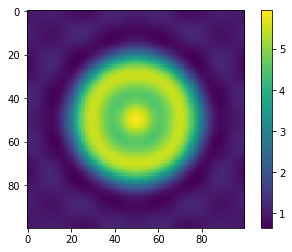

In [6]:
nG_init = 101 # total number of truncation order in 2D
Lk1,Lk2 = kb.Lattice_Reciprocate(L1,L2)  # reciprocal lattice vector
G,nG = kb.Lattice_getG(nG_init,Lk1,Lk2,method=0)
print nG

dN = 1./Nx/Ny
epscon = iff.get_conv(dN,eps_grid,G)  #convolution epsilon
# eps(x) * I = IFFT [ epsconv * delta_1i]
Jf = np.zeros(nG)
Jf[0] =1.
s_in = np.dot(epscon,Jf)
out = iff.get_ifft(Nx,Ny,s_in,G)

plt.figure()
plt.imshow(np.real(out))
plt.colorbar()
plt.show()